## PCA on WHO life expectancy data

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("Data/LifeExpectancyData.csv")
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
(df.sort_values("Year", ascending=False)).head(400)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2313,Singapore,2015,Developed,83.1,55.0,0,1.79,0.000000,96.0,0,...,96.0,NaN,96.0,0.1,53629.737460,NaN,2.2,2.2,0.924,15.4
2553,Tajikistan,2015,Developing,69.7,161.0,10,NaN,0.000000,96.0,3,...,96.0,NaN,96.0,0.2,918.677154,8548651.0,3.6,3.7,0.625,11.3
1651,Mauritania,2015,Developing,63.1,25.0,8,NaN,0.000000,73.0,1,...,67.0,NaN,73.0,0.9,1158.256469,4182341.0,7.8,7.5,0.513,8.5
930,France,2015,Developing,82.4,78.0,2,NaN,0.000000,86.0,157,...,98.0,NaN,98.0,0.1,36526.771100,6662468.0,0.7,0.6,0.894,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Gambia,2013,Developing,66.0,266.0,3,0.01,0.000000,97.0,0,...,96.0,6.49,97.0,1.6,NaN,NaN,7.6,7.5,0.445,8.9
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,NaN,17,...,94.0,11.25,94.0,0.1,61191.192630,5614932.0,1.1,0.9,0.924,18.7
772,Dominican Republic,2013,Developing,73.4,157.0,6,5.93,97.522115,8.0,0,...,82.0,4.12,83.0,0.3,627.555440,1281296.0,3.3,3.2,0.709,13.2
980,Georgia,2013,Developing,74.5,128.0,1,5.91,180.378703,96.0,7872,...,94.0,7.25,93.0,0.1,4274.376857,3776.0,2.7,2.8,0.755,13.5


<Axes: xlabel='Life expectancy ', ylabel='Year'>

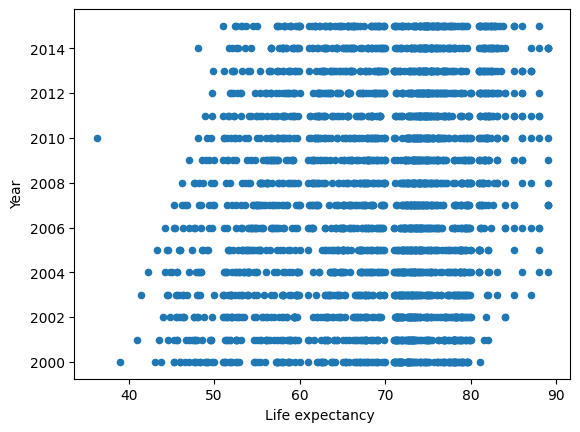

In [4]:
df.plot.scatter("Life expectancy ", "Year")


Now remove certain columns from the original dataframe.

In [5]:
df_cleaned = df.drop(["Status", "Year", "Country"], axis=1)
df_cleaned

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

It clear that there are quite a number of missing entries, in particular for Population, Hepatitis B and total expenditure. The easiest way to deal with them is to just remove them.

In [7]:
df_cleaned = df_cleaned.dropna()

First try to investigate the best predictor of life expectancy. Start by splitting the dataset, creating a second dataframe with only the lif expectancy data.

In [8]:
df_LifeExpectancy = df_cleaned["Life expectancy "]
df_LifeExpectancy

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64

In [9]:
df_cleaned = df_cleaned.drop("Life expectancy ", axis=1)
df_cleaned

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
len(df)-len(df_cleaned)

1289

Now we have cleaned the data we can start doing PCA. Due to all the missing values we have lost 1289 rows and 1649 are left

44.089.0


(array([  8.,   8.,  10.,   6.,  11.,  13.,   3.,  15.,  21.,  15.,  21.,
         19.,  30.,  30.,  36.,  41.,   2.,  32.,  37.,  34.,  47.,  65.,
         48.,  70.,  62.,  70.,   6.,  91., 118., 151., 114.,  83.,  53.,
         36.,  55.,  59.,   9.,  54.,  22.,   9.,   6.,   5.,   8.,   3.,
         13.]),
 array([44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
        83., 84., 85., 86., 87., 88., 89.]),
 <BarContainer object of 45 artists>)

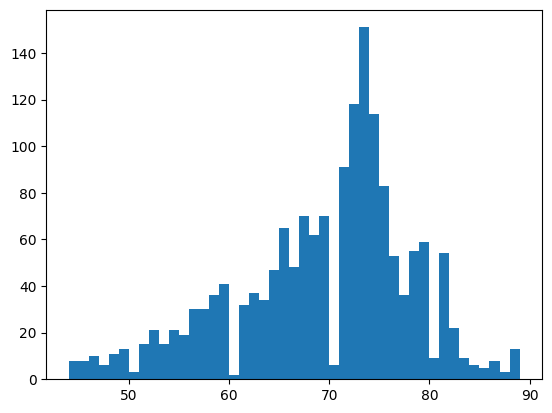

In [11]:
LifeExpectancy = df_LifeExpectancy.to_numpy()
print(str(min(df_LifeExpectancy)) + str(max(df_LifeExpectancy)))
plt.hist(LifeExpectancy, bins=45)

It is interesting to note that values seem to avoid being on 50, 60, 70, 80. this is an interesting quirk of the dataset that is present before the cleaning that has been done.
On closer inspection the data for all values have decimals but there are no values between 50 and 51 for example.

Time to decide on a labelling scheme, 

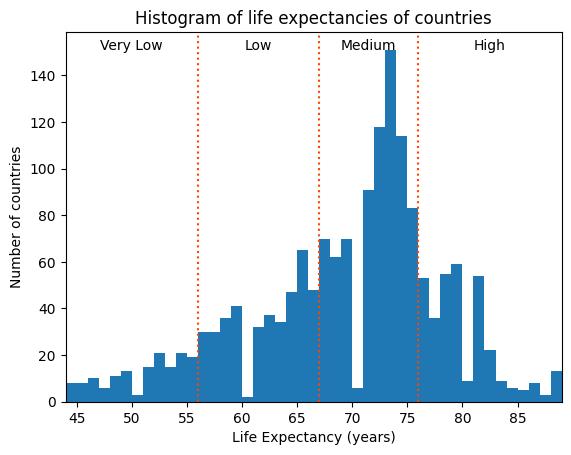

In [12]:
(n, bins, s) = plt.hist(LifeExpectancy, bins=45, range=(min(LifeExpectancy), max(LifeExpectancy)))
plt.xlim(xmin=min(LifeExpectancy), xmax=max(LifeExpectancy))

boundaries = [56,67,76]
descriptor = ["Very Low", "Low", "Medium", "High", "Very High"]

for i in range(len(boundaries) + 1):
    if i < len(boundaries):
        plt.axvline(boundaries[i], color="orangered", linestyle=":")
    if i == 0:
        xpos = (min(bins) + min(boundaries)) / 2
    elif i == len(boundaries):
        xpos = (max(bins) + max(boundaries)) / 2
    else:
        xpos = (boundaries[i] + boundaries[i-1]) / 2
    plt.text(x=xpos, y=max(n), s=descriptor[i], horizontalalignment='center')
    
plt.title("Histogram of life expectancies of countries")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Number of countries")
plt.savefig("Figures/LifeExpectancyLabelsHist.png")

The labelling scheme needs to be made

In [13]:
labels = []
for L in LifeExpectancy:
    for i in range(len(boundaries)):
        label = i
        if L < boundaries[i]:
            break
        else:
            label = i+1
    labels.append(label)

In [14]:
labels.count(0)

150

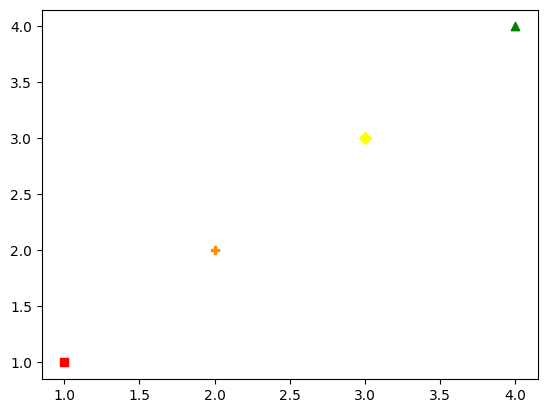

In [15]:
x = [1,2,3,4]
y = [1,2,3,4]
m = ['s', 'P','D', '^']
colour = ['red', 'darkorange', 'yellow', 'green']

for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colour[i], marker=m[i])

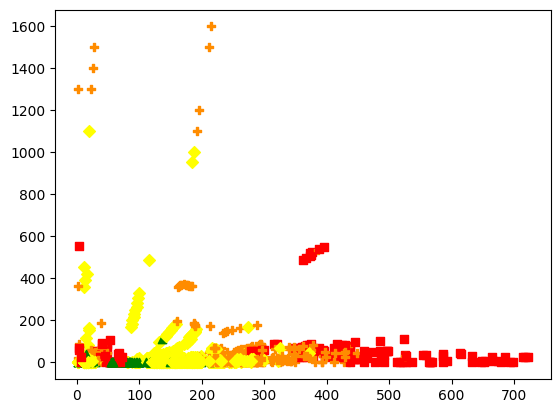

In [16]:
xvar = df_cleaned["Adult Mortality"].to_numpy()
yvar = df_cleaned["infant deaths"].to_numpy()

for i in range(len(df_cleaned)):
    plt.scatter(xvar[i], yvar[i], color=colour[labels[i]], marker=m[labels[i]])

(18, 1649)
[1.88706374e-03 1.14799794e-03 6.33060782e-04 4.39971198e-04
 3.74792762e-04 2.15495796e-04 1.73126658e-04 1.26248238e-04
 8.23178056e-05 7.19682720e-05 6.86456808e-05 1.36558566e-06
 7.14706116e-06 2.72363670e-05 1.36085807e-05 2.36068289e-05
 1.85154722e-05 2.05073907e-05]
(1649, 3)


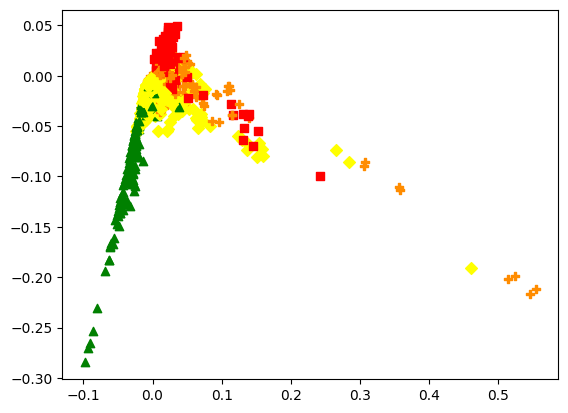

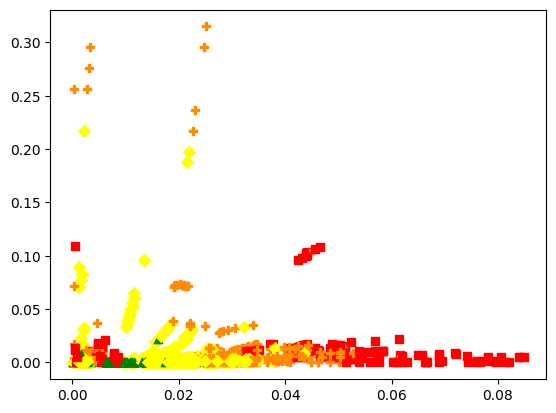

In [19]:
data = df_cleaned.to_numpy()
print(np.shape(data.T))
data = data.T
data = preprocessing.normalize(data)
C = np.cov(data)
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues)
original_cov_matrix = np.diagflat(eigenvalues)

back_to_cov = eigenvectors @ original_cov_matrix @ eigenvectors.T
eigscores = np.dot(data.T, eigenvectors[:, :3])
print(np.shape(eigscores))
for i in range(len(df_cleaned)):
    plt.scatter(eigscores[:, 0][i], eigscores[:, 1][i], color=colour[labels[i]], marker=m[labels[i]])
plt.savefig("Figures/PCAScatter")
plt.show()
for i in range(len(df_cleaned)):
    plt.scatter(data.T[:, 0][i], data.T[:, 1][i], color=colour[labels[i]], marker=m[labels[i]])


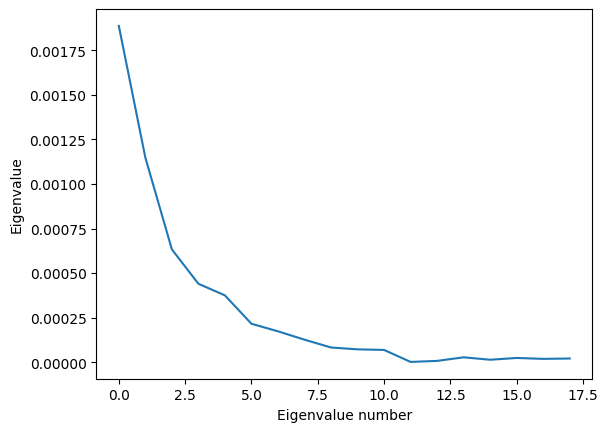

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [18]:
plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue")
plt.savefig("EigenvalueDistribution.png")
plt.show()
sum(eigenvalues[:5])/sum(eigenvalues)

plt.plot

This suggests that 84 percent of the variance can be described by 5 variables, rather than 100 percent of the variance by 18

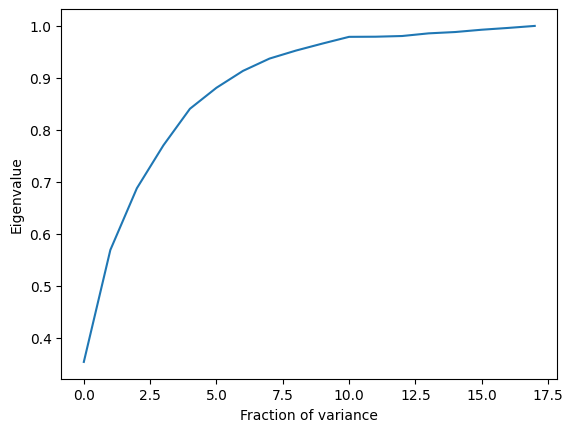

In [33]:
running_total = 0 
cumulative_eigenvalues = [0]
for x in eigenvalues:
    cumulative_eigenvalues.append(cumulative_eigenvalues[-1]+x)
cumulative_eigenvalues.pop(0)
plt.plot(np.arange(len(eigenvalues)), cumulative_eigenvalues/sum(eigenvalues))
plt.xlabel("Fraction of variance")
plt.ylabel("Eigenvalue")
plt.savefig("EigenvalueFraction.png")
plt.show()